In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [4]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [14]:
y=df[["Chirps/Second"]].values
x=df[["Ground Temperature"]].values

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [9]:
print("Intercept:",regressor.intercept_)
print("Coef:",regressor.coef_)

Intercept: [22.84898231]
Coef: [[3.410323]]


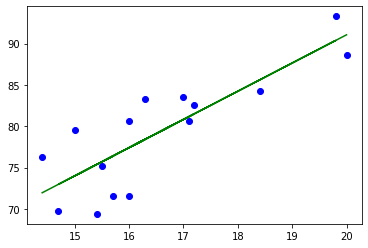

In [10]:
plt.scatter(x,y,color="blue")
plt.plot(x,regressor.predict(x),color="green")

In [12]:
print("Rsqure:",regressor.score(x,y))

Rsqure: 0.6922946529147003


Rsquare value is below 8.0 so this data is not fit

In [15]:
regressor.predict([[95]])

array([[19.74428913]])

In [16]:
18-(regressor.intercept_) /regressor.coef_

array([[15.73736329]])

With an observation of 18 chirps/sec, we expect a ground temp of 15.7˚F 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [35]:
df = pd.read_fwf("brain_body.txt")

In [36]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [38]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df.corr

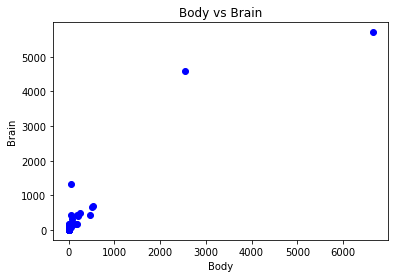

In [41]:
x=df[["Brain"]].values
y=df[["Body"]].values
plt.scatter(x,y,color="blue")
plt.title("Body vs Brain")
plt.xlabel("Body")
plt.ylabel("Brain")
plt.show()

In [42]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [43]:
print("Intercept:",regressor.intercept_)
print("Coef:",regressor.coef_)

Intercept: [91.00439621]
Coef: [[0.96649637]]


In [44]:
regressor.score(x,y)

0.8726620843043331

This score is greater than 0.8, so it is a good fit for this **data**

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [67]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [68]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [69]:
feature=["Sex","Rank","Year","Degree","YSdeg"]
x=df[feature]
y=df.Salary

In [70]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x,y)

LinearRegression()

In [71]:
print("Feature & Coeffecient")
print(list(zip(feature,regressor.coef_)))

Feature & Coeffecient
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]


In [72]:
salary_discrimction_col=["Sex","Rank","Year","Degree","YSdeg"]

In [73]:
def linear_reg_eq (salary_discrimction_col,df):
  input_col=df[salary_discrimction_col]
  salary=df['Salary']
  regressor=LinearRegression()
  regressor.fit(input_col,salary)
  print(f'The equation for coloum {salary_discrimction_col} with respect to salary :{regressor.coef_} + {regressor.intercept_}')
linear_reg_eq (salary_discrimction_col,df)

The equation for coloum ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to salary :[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


In [74]:
def liner_reg_wrt_focus(salary_discrimction_col,df,focus="Salary"):
  input_col=df[salary_discrimction_col]
  focus_output=df[focus]
  regressor.fit(input_col,focus_output)
  return regressor.score(input_col,focus_output)
print(f'R^2 value of all coloumns{liner_reg_wrt_focus(salary_discrimction_col,df)}')
#liner_reg_wrt_focus(salary_discrimction_col,df)

R^2 value of all coloumns0.8547180674410969


In [89]:
from itertools import combinations
def get_combos(cols):
    return [combinations(cols, n + 1) for n in range(len(cols))]
combos = get_combos(salary_discrimction_col)

In [90]:
def for_all_combo_scores(combos,df,focus="Salary"):
  combo_scores={}
  for i in range(len(list(combos))):
    for a in list(combos[i]):
      combo_scores[liner_reg_wrt_focus(list(a), df, focus)] = a
    return combo_scores
combo_scores = for_all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.7525360539274633, ('Rank',)),
 (0.49093702676921624, ('Year',)),
 (0.45542813458360276, ('YSdeg',)),
 (0.06389892583288004, ('Sex',)),
 (0.004861680984748373, ('Degree',))]

# It is worth noting that Sex on its own has a score very close to zero (0.063898925832880038), indicating that it has no direct influence on salary.**bold text**

In [95]:
num_by_sex=df.Sex.value_counts()
print(f'Num of men {num_by_sex[0]}\nNum of Womens {num_by_sex[1]}')

Num of men 38
Num of Womens 14


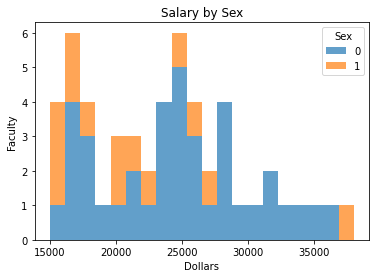

In [96]:
df.pivot_table(index=df.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

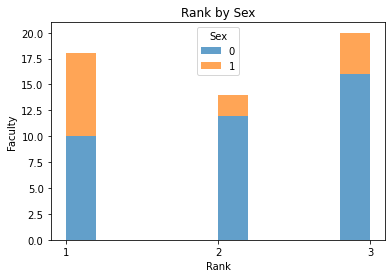

In [97]:
df.pivot_table(index=df.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()

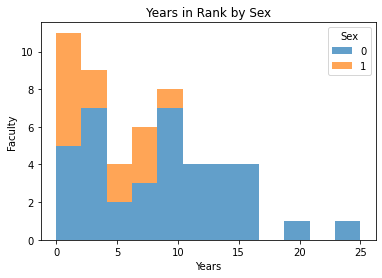

In [98]:
df.pivot_table(index=df.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()

sex on its own has a score very close to zero (0.063898925832880038), By this we can conclude that, There is no salary discrimination by Sex.